# Scipy Tutorial

###  By: Qin Che, Peiyu Li , Jun Song, Zimei Xu

## Motivation 

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. 

It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

SciPy on Python makes a powerful programming language available for use in developing sophisticated programs and specialized applications. 


## Installation
### Scientific Python distributions
For most users, especially on Windows, the easiest way to install the packages of the SciPy stack is to download one of these Python distributions, which include all the key packages:

Anaconda: A free distribution for the SciPy stack. Supports Linux, Windows and Mac.
Enthought Canopy: The free and commercial versions include the core SciPy stack packages. Supports Linux, Windows and Mac.
Python(x,y): A free distribution including the SciPy stack, based around the Spyder IDE. Windows only.
WinPython: A free distribution including the SciPy stack. Windows only.
Pyzo: A free distribution based on Anaconda and the IEP interactive development environment. Supports Linux, Windows and Mac.

### Installing via pip

Mac and Linux users can install pre-built binary packages for the SciPy stack using pip. Pip can install pre-built binary packages in the wheel package format.

Note that you need to have Python and pip already installed on your system.

pip does not work well for Windows because the standard pip package index site, PyPI, does not yet have Windows wheels for some packages, such as SciPy.

To install via pip on Mac or Linux, first upgrade pip to the latest version:

python -m pip install --upgrade pip

Then install the SciPy stack packages with pip. We recommend a user install, using the --user flag to pip (note: don’t use sudo pip, that will give problems). This installs packages for your local user, and does not need extra permissions to write to the system directories:



For user installs, make sure your user install executable directory is on your PATH. Here are example commands for setting the user PATH:

##  Platform Restriction

No platform restriction. This package can run on multiple platforms including Windows, Mac OS, Linux.

## Dependent Libraries 

Scipy library is dependent on numpy, sometimes pandas in case of dealing with dataframe.

#  Part 1. Scipy.stats

## Import Package

Type either one of the following code in IPython notebook

In [1]:
import scipy.stats as stats

In [2]:
from scipy import stats

## Example 1

### scipy.stats.pearsonr (x, y)

Parameters:
1. x : (N,) array_like
2. y : (N,) array_like

Returns:

1. corrcoef : float (Pearson’s correlation coefficient)
2. p-value : float (2-tailed p-value)

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
x=np.arange(10)
x
y=np.arange(11,21)
y

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [5]:
stats.pearsonr(x,y)

(1.0, 0.0)

### Minimal working example

#### 1. Type Error
There must be two arguments in stats.pearsonr() function call, otherwaise it gives error warning.

In [6]:
a = np.array([1, 2, 3])
b = np.array([0, 4, 1])
x = stats.pearsonr(a)
x

TypeError: pearsonr() missing 1 required positional argument: 'y'

In [7]:
a = np.array([1, 2, 3])
b = np.array([0, 4, 1])
x = stats.pearsonr(a,b)
x

(0.24019223070763071, 0.84557904168873266)

#### 2. Value Error 
Each argument should be the same in shape.

In [8]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([0, 4, 1])
x = stats.pearsonr(a,b)
x

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
a.shape

(2, 3)

In [10]:
b.shape

(3,)

In [11]:
a = np.array([1, 2, 3])
b = np.array([0, 4, 1])
x = stats.pearsonr(a,b)
x

(0.24019223070763071, 0.84557904168873266)

### Alternative 1:

In [12]:
df=pd.DataFrame({'x':np.arange(10),'y':np.arange(11,21)})

In [13]:
df.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


For p-value, there's no built-in function about distribution in numpy package, thus numpy cannot directly calculate p-value. If necessary, we can use the definition of  t distribution to calculate p-value which the process will be cumbersome.

## Example 2

### scipy.stats.linregress(x, y = None)

Parameters:	

x, y : array_like 

1. Two sets of measurements. 
    Both arrays should have the same length. 
2. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2. 
    The two sets of measurements are then found by splitting the array along the length-2 dimension.

Returns:	

1. slope : float    (slope of the regression line)
2. intercept : float    (intercept of the regression line)
3. rvalue : float    (correlation coefficient)
4. pvalue : float    (two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.)
5. stderr : float    (Standard error of the estimated gradient.)

Calculate a linear least-squares regression for two sets of measurements.

In [18]:
from scipy import stats
np.random.seed(423)
x = np.random.random(20)
y = np.random.random(20)

In [19]:
result = stats.linregress(x,y)

In [20]:
stats.linregress(x,y)

LinregressResult(slope=-0.18098477148618336, intercept=0.62454639529821299, rvalue=-0.17267819204022053, pvalue=0.46660579940866975, stderr=0.24332960374940393)

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [22]:
slope

-0.18098477148618336

### Minimal working example

#### 1. Index Error
If only one parameter X is gived, X must be a two-dimentional array with length at least 2.

In [23]:
x = np.array([1, 2, 3])
x.shape

(3,)

In [24]:
stats.linregress(x)

IndexError: tuple index out of range

In [25]:
x = np.array([[1, 2],[4,5]])
x.shape

(2, 2)

In [26]:
stats.linregress(x)

//anaconda/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:97: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


LinregressResult(slope=1.0, intercept=3.0, rvalue=1.0, pvalue=nan, stderr=nan)

#### 2. NaN Related Problems
The input should not contain NaNs, which means when there is NaN in the inputs, the outcome will be filled with NaNs.

In [27]:
x = np.array([[1,2,np.nan,6],[3,np.nan,4,5]])

In [28]:
stats.linregress(x)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

To solve this problem, we should drop all the NaNs in the original array.  
Firstly, we keep the elements which are not NaNs and reshape the X into a 2 dimentional array.  
The new shape will be (2, number of non-NaN elements divided by 2)  
And then we can run the function without NaN in the outcome.

In [29]:
np.isnan(x)

array([[False, False,  True, False],
       [False,  True, False, False]], dtype=bool)

In [30]:
x=x[np.isnan(x)==False].reshape(2,int((x.shape[0]*x.shape[1]-np.isnan(x).sum())/2))

In [31]:
stats.linregress(x)

LinregressResult(slope=0.35714285714285715, intercept=2.9285714285714288, rvalue=0.94491118252306805, pvalue=0.2122956150096566, stderr=0.12371791482634842)

### Alternative 1

There is another package in Python called "statsmodels" which can also implement linear regression.

Obviously, the statsmodels offered us a more detailed result, and the result contains more information.

So for simply calculation of least-squares regression in cases with a single explanatory variable, the process for scipy.stats.linregress is comparatively easier.

In [32]:
import statsmodels.api as sm

In [34]:
x = np.random.random(20)
y = np.random.random(20)
model=sm.OLS(x,y)

In [35]:
results=model.fit()

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.41
Date:                Mon, 20 Feb 2017   Prob (F-statistic):           1.73e-05
Time:                        23:54:36   Log-Likelihood:                -8.2857
No. Observations:                  20   AIC:                             18.57
Df Residuals:                      19   BIC:                             19.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7153      0.126      5.693      0.0

### Alternative 2 

In [37]:
np.polynomial.polynomial.polyfit(x,y,1)

array([ 0.62900018, -0.06329947])

#  Part 2. Scipy. linalg

## Motivation
Scipy.linalg contains all the functions in numpy.linalg. plus some other more advanced ones not contained in numpy.linalg.  
Another advantage of using scipy.linalg over numpy.linalg is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional.  
Therefore, the scipy version might be faster depending on how numpy was installed.We are going to use scipy.linalg.solve and scipy.linalg.lstsq as examples to illustrate.

## Import Package

Type either one of the following code in IPython notebook

In [38]:
import scipy.linalg

In [39]:
from scipy import linalg

## Example 1

### scipy.linalg.solve (a, b)

Parameters:

1. a : (M, M) array_like    
    A square matrix.
2. b : (M,) or (M, N) array_like    
    Right-hand side matrix in a x = b.
3. sym_pos : bool, optional    
    Assume a is symmetric and positive definite.
4. lower : bool, optional    
    Use only data contained in the lower triangle of a, if sym_pos is true. Default is to use upper triangle.
5. overwrite_a : bool, optional    
    Allow overwriting data in a (may enhance performance). Default is False.
6. overwrite_b : bool, optional    
    Allow overwriting data in b (may enhance performance). Default is False.
7. check_finite : bool, optional    
    Whether to check that the input matrices contain only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs.

Returns:

    x : (M,) or (M, N) ndarray  
    Solution to the system a x = b. Shape of the return matches the shape of b.

#### Use case: Finding the prediction model for a linear SVM problem by applying linalg.solve
As we know, linalg.solve is a function to solve the linear systems of equations, so we can apply it to fit a prediction model for a linear SVM problem.  
Below is the example to show the work of fitting a prediction model for a linear SVM by applying linalg.solve.

The original function is f(x)= (3.0)x1 + (-1.0)x2 + (1.0) + e.
The prediction model function is f(x)= (2.3)x1 + (-1.0)x2 + (-4.9).
The accuracy for this prediction model is 0.936.


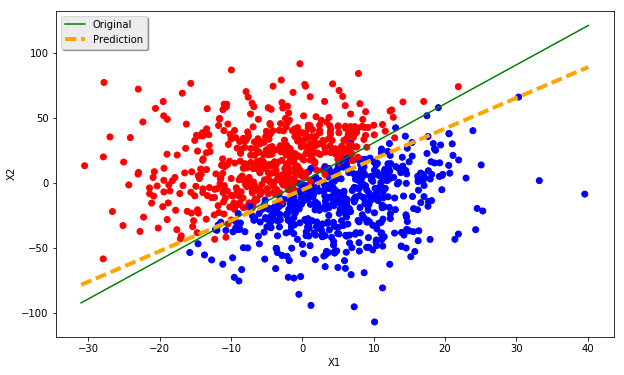

In [20]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

#Build up a function to get on which side the result is.
def get_colors(y):
    colors = np.empty(len(y), dtype='<U4')
    colors[np.where(y>0)] = 'blue'
    colors[np.where(y<0)] = 'red'
    return colors

#Build up the original dataset follows the function: f(x) = 3x1 - x2 + 1 + e, where e represents the random error.
c1,c2,c3 = 3, -1, 1

np.random.seed(1)
x1 = 10 * np.random.randn(1000)
np.random.seed(8)
x2 = 30 * np.random.randn(1000)

np.random.seed(20)
e = 5 * np.random.randn(1000)

y = c1*x1 + c2*x2 + c3 + e

colors1 = get_colors(y)
x1Range = np.array([(min(x1)-.5),(max(x1)+.5)])
Hyperplane = (c3 + c1*x1Range)/(-c2)

#randomly pic three points from the original data
pic_ix = np.random.randint(1,len(x1),3)
a = np.array([x1,x2,np.ones(len(x1))]).T[pic_ix]
b = y[pic_ix]

#use linalg.solve to compute the coefficients for the formula
x = linalg.solve(a,b)
print('The original function is f(x)= (%.1f)x1 + (%.1f)x2 + (%.1f) + e.'%(c1,c2,c3))
print('The prediction model function is f(x)= (%.1f)x1 + (%.1f)x2 + (%.1f).'%(x[0],x[1],x[2]))

#predict the outcomes with the new coefficients
y_pre = x[0]*x1 + x[1]*x2 + x[2]

colors2 = get_colors(y_pre)
Hyperplane2 = (x[2] + x[0]*x1Range)/(-x[1])

accuracy = sum(np.array(colors1) == np.array(colors2)) / len(x1)
print('The accuracy for this prediction model is %.3f.'%accuracy)

fig, ax = plt.subplots(figsize=(10,6))
#Blue points are for expression larger than 0 and red points are for expression smaller than 0.
ax.scatter(x1, x2, c=colors1, cmap=plt.cm.Paired)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.plot(x1Range,Hyperplane,'-k', label='Original', c='green')
ax.plot(x1Range,Hyperplane2,'--k', label='Prediction', c='orange', linewidth=4)
legend = ax.legend(loc='upper left', shadow=True)

### Alternative 1
Solving linear systems of equations is straightforward using the scipy
command <tt class="xref py py-obj docutils literal"><span class="pre">linalg.solve</span></tt>. This command expects an input matrix and
a right-hand-side vector. The solution vector is then computed. An
option for entering a symmetric matrix is offered which can speed up
the processing when applicable.  As an example, suppose it is desired
to solve the following simultaneous equations:</p>
<div class="math">
\begin{eqnarray*} x + 3y + 5z & = & 10 \\
                   2x + 5y + z & = & 8  \\
                   2x + 3y + 8z & = & 3
 \end{eqnarray*}</div><p>We could find the solution vector using a matrix inverse:</p>
<div class="math">
\begin{split}\left[\begin{array}{c} x\\ y\\ z\end{array}\right]=\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]^{-1}\left[\begin{array}{c} 10\\ 8\\ 3\end{array}\right]=\frac{1}{25}\left[\begin{array}{c} -232\\ 129\\ 19\end{array}\right]=\left[\begin{array}{c} -9.28\\ 5.16\\ 0.76\end{array}\right].\end{split}</div>

In [21]:
import numpy as np
from scipy import linalg
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x=linalg.inv(a).dot(b) # slow
print(x)
print(a.dot(x) - b)  # check

[ 4.33333333 -2.66666667  0.33333333]
[  8.88178420e-16   8.88178420e-16   1.11022302e-15]


However, it is better to use the linalg.solve command which can be faster and more numerically stable. In this case it however gives the same answer as shown in the following example:

In [22]:
y=np.linalg.solve(a, b) # fast
print(y)
print(a.dot(y) - b)  # check

[ 4.33333333 -2.66666667  0.33333333]
[  0.00000000e+00  -4.44089210e-16  -6.66133815e-16]


### Alternative 2
An alternative to solve SVM problem is to apply the specific function 'sklearn.svm'.

In [23]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import pandas as pd

#fit a SVM model by applying sklearn.svm
y_svc = np.ones(len(colors1))
y_svc[colors1=='red'] = -1
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y_svc})

clf = svm.SVC(kernel='linear',C=100)
clf.fit(df[['x1','x2']], df['y'])

#get the coefficients of this model
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
print('The prediction model function is f(x)= (%.1f)x1 + (%.1f)x2 + (%.1f).'%(beta1,beta2,beta0))
accuracy_svm = sum(clf.predict(df[['x1','x2']]) == y_svc) / len(x1)
print('The accuracy for this prediction model is %.3f, comparing to %.3f of the model fitted by linalg.solve.'%(accuracy_svm, accuracy))

The prediction model function is f(x)= (0.7)x1 + (-0.2)x2 + (0.2).
The accuracy for this prediction model is 0.969, comparing to 0.936 of the model fitted by linalg.solve.


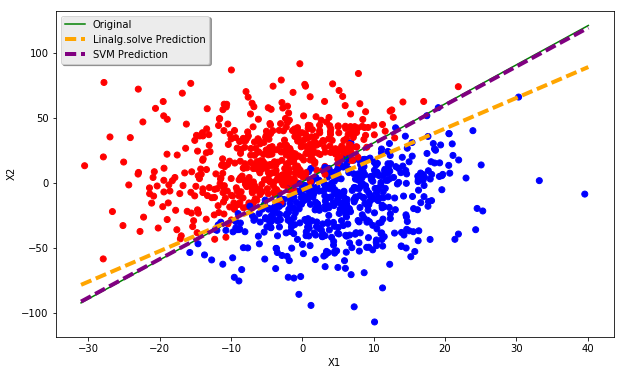

In [24]:
#hyperplane by sklearn.svm
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, x1Range))

#plot the predictions
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x1, x2, c=colors1, cmap=plt.cm.Paired)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.plot(x1Range,Hyperplane,'-k', label='Original', c='green')
ax.plot(x1Range,Hyperplane2,'--k', label='Linalg.solve Prediction', c='orange', linewidth=4)
ax.plot(x1Range,X2_hyperplane,'--k', label='SVM Prediction', c='purple', linewidth=4)
legend = ax.legend(loc='upper left', shadow=True)

### Minimal working example

#### 1. Importing package
To use the package "scipy.linalg", we have to import it seperately instead of importing the parent package "scipy".  
(* Please restart your kernel before you run the following code.)

In [1]:
import numpy as np
import scipy as sp
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

NameError: name 'linalg' is not defined

The error message is: name 'linalg' is not defined  
To fix this, replace the second line of the code as below:  
(* Again, please restart your kernel before you run the following code.)

In [1]:
import numpy as np
from scipy import linalg
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 4.33333333, -2.66666667,  0.33333333])

#### 2. Value error
The two inputing arguments for "linalg.solve" should be array_like. So they should be given in correct array format, that is, [[a,b],[c,d],[e,f]] for 2-D or [a,b,c] for 1-D.

In [2]:
a = np.array([1, 2, 3], [1, 0, -1], [2, 3, 1])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

ValueError: only 2 non-keyword arguments accepted

The error message is: only 2 non-keyword arguments accepted  
From the error information we can see the error is incurred in the first line, because it lacks a "[]" for a 2-D array definition. We can fix it by just adding the "[]" outside of the elements as below:

In [3]:
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 4.33333333, -2.66666667,  0.33333333])

#### 3. ValueError
The input matrix a for linalg.solve should be a square matrix.

In [4]:
a = np.array([[1, 2, 3, 4], [1, 0, -1, 1], [2, 3, 1, 3]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

ValueError: expected square matrix

The error message is: expected square matrix  
When this error appears, check the shape of a:

In [5]:
a.shape

(3, 4)

Trailor a to a square matrix and then process:

In [6]:
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 4.33333333, -2.66666667,  0.33333333])

The input array b (M, 1) or matrix b (M, K) for linalg.solve should have the M that equals to the width of a.

In [7]:
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1, 2])
x = linalg.solve(a, b)
x

ValueError: incompatible dimensions

The error message is: incompatible dimensions  
When this error appears, check the shape of a and b:

In [8]:
print(a.shape, b.shape)

(3, 3) (4,)


Trailor a or b to match each other and then process:

In [9]:
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 4.33333333, -2.66666667,  0.33333333])

The values in both a and b should not be infinite or NaN.

In [10]:
a = np.array([[1, 2, 3], [1, np.inf, -1], [2, 3, np.nan]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

ValueError: array must not contain infs or NaNs

The error message is: array must not contain infs or NaNs  
When this error appears, check where is the infinite or NaN value:

In [11]:
np.where(np.isnan(a))

(array([2]), array([2]))

In [12]:
np.where(np.isinf(a))

(array([1]), array([1]))

Replace the invalide values with appropriate values and then process:

In [13]:
a = np.array([[1, 2, 3], [1, 0, -1], [2, 3, 0]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 4.25, -2.5 ,  0.25])

#### 4. LinAlgError
The input matrix a for linalg.solve should not be a singular matrix.

In [14]:
a = np.array([[1, 0, 1], [0, 0, 1], [0, 0, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

LinAlgError: singular matrix

In this case, pick other combinations of data to construct a new square matrix.

In [15]:
a = np.array([[1, -1, 1], [2, 0, 1], [-1, 3, 1]])
b = np.array([0, 4, 1])
x = linalg.solve(a, b)
x

array([ 2.5,  1.5, -1. ])

## Example 2
### scipy.linalg.lstsq (a, b)

Parameters:

1. a : (M, N) array_like  
    Left hand side matrix (2-D array).
2. b : (M,) or (M, K) array_like  
    Right hand side matrix or vector (1-D or 2-D array).
3. cond : float, optional  
    Cutoff for ‘small’ singular values; used to determine effective rank of a. Singular values smaller than rcond * largest_singular_value are considered zero.
4. overwrite_a : bool, optional  
    Discard data in a (may enhance performance). Default is False.
5. overwrite_b : bool, optional  
    Discard data in b (may enhance performance). Default is False.
6. check_finite : bool, optional  
    Whether to check that the input matrices contain only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs.
7. lapack_driver: str, optional  
    Which LAPACK driver is used to solve the least-squares problem. Options are 'gelsd', 'gelsy', 'gelss'. Default ('gelsd') is a good choice. However, 'gelsy' can be slightly faster on many problems. 'gelss' was used historically. It is generally slow but uses less memory.

Returns:

1. x : (N,) or (N, K) ndarray  
    Least-squares solution. Return shape matches shape of b.
2. residues : () or (1,) or (K,) ndarray  
    Sums of residues, squared 2-norm for each column in b - a x. If rank of matrix a is < N or > M, or 'gelsy' is used, this is an empty array. If b was 1-D, this is an (1,) shape array, otherwise the shape is (K,).
3. rank : int  
    Effective rank of matrix a.
4. s : (min(M,N),) ndarray or None  
    Singular values of a. The condition number of a is abs(s[0] / s[-1]). None is returned when 'gelsy' is used.

#### Use case: Finding the prediction model for both linear and non-linear regression problem by applying linalg.lstsq
The function linalg.lstsq is to solve the linear least-squares problems, so we can apply it to fit a prediction model for a regression problem.  
Below is the example to show the work of fitting prediction models for a linear regression, a squared regression, and an expotional regression by applying linalg.lstsq.

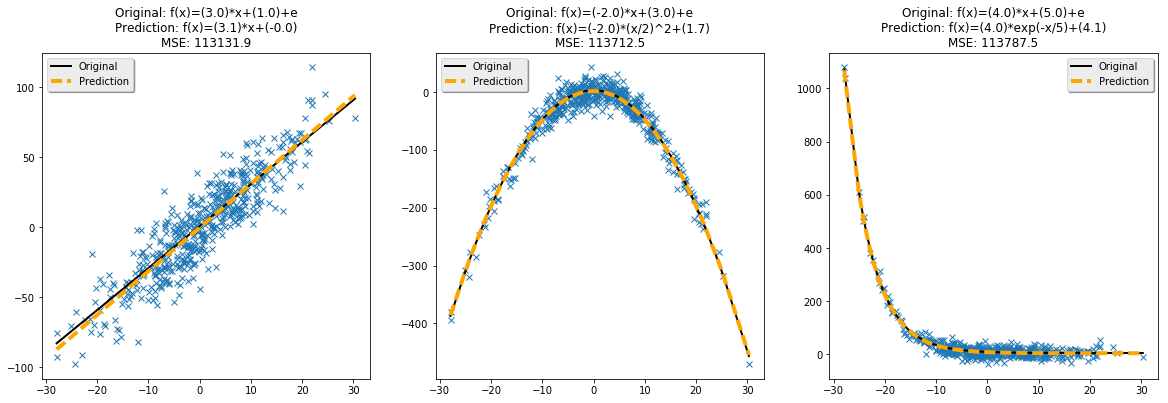

In [25]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

#build the original dataset for three functions: f(x)=3x+1+e, f(x)=-2(x/2)^2+3+e, f(x)=4exp(-x/5)+5+e, where e reprensents random errors.
c1 = [3, 1]
c2 = [-2, 3]
c3 = [4, 5]

np.random.seed(1)
x1 = np.sort(10 * np.random.randn(500))
x2 = (x1/2)**2
x3 = np.exp(-x1/5)

np.random.seed(12)
e = 15 * np.random.randn(500)

y1 = c1[0]*x1 + c1[1] + e
y2 = c2[0]*((x1/2))**2 + c2[1] + e
y3 = c3[0]*np.exp(-x1/5) + c3[1] + e

#Prepare the arguments for linalg.lstsq
a1 = np.array([x1,np.ones(len(x1))]).T
b1 = y1
a2 = np.array([(x1/2)**2,np.ones(len(x1))]).T
b2 = y2
a3 = np.array([np.exp(-x1/5),np.ones(len(x1))]).T
b3 = y3

#use linalg.solve to compute the coefficients for the formula
c_pre1, resid1, rank1, sigma1 = linalg.lstsq(a1,b1)
c_pre2, resid2, rank2, sigma2 = linalg.lstsq(a2,b2)
c_pre3, resid3, rank3, sigma3 = linalg.lstsq(a3,b3)
#predict the outcomes with the new coefficients
y_pre1 = c_pre1[0]*x1 + c_pre1[1]
y_pre2 = c_pre2[0]*((x1/2)**2) + c_pre2[1]
y_pre3 = c_pre3[0]*np.exp(-x1/5) + c_pre3[1]

fig, axes = plt.subplots(1,3,figsize=(20,6))
#The original data are in blue 'x' points, and the prediction model is the orange curve.
axes[0].plot(x1,y1,'x')
axes[0].plot(x1,c1[0]*x1+c1[1],'-k', linewidth=2, label='Original')
axes[0].plot(x1,y_pre1,'--k', linewidth=4, c='orange', label='Prediction')
axes[0].set_title('Original: f(x)=(%.1f)*x+(%.1f)+e\nPrediction: f(x)=(%.1f)*x+(%.1f)\nMSE: %.1f'%(c1[0],c1[1],c_pre1[0],c_pre1[1],resid1))

axes[1].plot(x1,y2,'x')
axes[1].plot(x1,c2[0]*x2+c2[1],'-k', linewidth=2, label='Original')
axes[1].plot(x1,y_pre2,'--k', linewidth=4, c='orange', label='Prediction')
axes[1].set_title('Original: f(x)=(%.1f)*x+(%.1f)+e\nPrediction: f(x)=(%.1f)*(x/2)^2+(%.1f)\nMSE: %.1f'%(c2[0],c2[1],c_pre2[0],c_pre2[1],resid2))

axes[2].plot(x1,y3,'x')
axes[2].plot(x1,c3[0]*x3+c3[1],'-k', linewidth=2, label='Original')
axes[2].plot(x1,y_pre3,'--k', linewidth=4, c='orange', label='Prediction')
axes[2].set_title('Original: f(x)=(%.1f)*x+(%.1f)+e\nPrediction: f(x)=(%.1f)*exp(-x/5)+(%.1f)\nMSE: %.1f'%(c3[0],c3[1],c_pre3[0],c_pre3[1],resid3))

axes[0].legend(loc='upper left', shadow=True)
axes[1].legend(loc='upper left', shadow=True)
axes[2].legend(loc='upper right', shadow=True)

Also, linalg.lstsq can be applied to multiple dimentional regression problems.  
Below is the example to show the work of fitting a prediction model for a 3-D non-linear regression by applying linalg.lstsq.

In [26]:
#build the original dataset for the function: f(x) = 3x - 2(x/2)^2 + 4exp(-x/5) + 1 + e, where e represents random errors.
c = [3, -2, 4, 1]

np.random.seed(1)
x1 = np.sort(10 * np.random.randn(500))
x2 = (x1/2)**2
x3 = np.exp(-x1/5)

np.random.seed(12)
e = 15 * np.random.randn(500)

y = c[0]*x1 + c[1]*x2 + c[2]*x3 + c[3] + e

#Prepare the arguments for linalg.lstsq
a = np.array([x1,x2,x3,np.ones(len(x1))]).T
b = y

#use linalg.solve to compute the coefficients for the formula
c_pre, resid, rank, sigma = linalg.lstsq(a,b)
#predict the outcomes with the new coefficients
y_pre = c_pre[0]*x1 + c_pre[1]*x2 + c_pre[2]*x3 + c_pre[3]

print('The original function is f(x)= (%.1f)x + (%.1f)(x/2)^2 + (%.1f)exp(-x/5) + (%.1f) + e.'%(c[0], c[1],c[2],c[3]))
print('The prediction model function is f(x)= (%.1f)x + (%.1f)(x/2)^2 + (%.1f)exp(-x/5) + (%.1f).'%(c_pre[0],c_pre[1],c_pre[2],c_pre[3]))
print('The MSE for the prediction model is %.1f.'%(resid))

The original function is f(x)= (3.0)x + (-2.0)(x/2)^2 + (4.0)exp(-x/5) + (1.0) + e.
The prediction model function is f(x)= (3.1)x + (-2.0)(x/2)^2 + (4.0)exp(-x/5) + (-0.3).
The MSE for the prediction model is 113027.9.


### Alternative
we also can use the function np.polyfit in numpy pacage and sklearn to run the regression. The np.polyfit estimates the regression for a polynomial of a single variable, but doesn't return much in terms of extra statisics.  To use the sklearn, we need to transform x to a polynomial form with the degrees we are testing at.

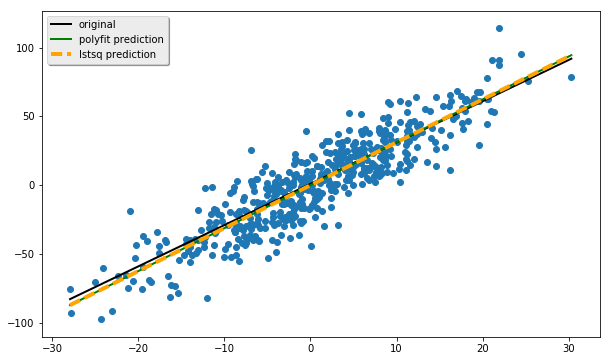

In [27]:
#fit the model with np.polifit
fit = np.polyfit(x1, y1, deg=1)

#plot all the models
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x1,c1[0]*x1+c1[1],'-k', linewidth=2, label='original')
ax.plot(x1, fit[0] * x1 + fit[1], linewidth=2, color='green', label='polyfit prediction')
ax.plot(x1,y_pre1,'--k', linewidth=4, c='orange', label='lstsq prediction')
ax.scatter(x1, y1)
ax.legend(loc='upper left', shadow=True)

### Minimal working example
Most of the problems for scipy.linalg.lstsq are similar to scipy.linalg.solve.

#### ValueError
For the (M, N) matrix a, array b (M, 1) or matrix b (M, K) should have its M equaling to the M in a.

In [28]:
a = np.array([[1, 2, 3, 4], [1, 0, -1, 1], [2, 3, 1, 5]])
b = np.array([[0, 4], [1, 1]])
x = linalg.lstsq(a, b)
x

ValueError: incompatible dimensions

The error message is: incompatible dimensions  
When this error appears, check the shape of a and b:

In [29]:
print(a.shape, b.shape)

(3, 4) (2, 2)


Trailor a or b to match each other and then process:

In [30]:
a = np.array([[1, 2, 3, 4], [1, 0, -1, 1], [2, 3, 1, 5]])
b = np.array([[0, 4], [1, 1], [2, 3]])
x = linalg.lstsq(a, b)
x

(array([[ 0.2       ,  0.8       ],
        [ 0.4       , -1.28888889],
        [-0.6       ,  0.71111111],
        [ 0.2       ,  0.91111111]]),
 array([], dtype=float64),
 3,
 array([ 8.14647262,  2.2907026 ,  0.6226279 ]))


## Other Interesting Features

Scipy.signal:The signal processing toolbox currently contains some filtering functions, a limited set of filter design tools, and a few B-spline interpolation algorithms for one- and two-dimensional data.

Spicy.optimize:package provides several commonly used optimization algorithms. For example, the minimize function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize. The minimize function also provides an interface to several constrained minimization algorithm.

Scipy.integrate : This provides several integration techniques including an ordinary differential equation integrator. The function quad is provided to integrate a function of one variable between two points. The mechanics for double and triple integration have been wrapped up into the functions dblquad and tplquad.


## References

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/index.html